In [2]:
import pandas as pd

In [3]:
sdata = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [4]:
%time
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.63 µs


In [5]:
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
import datetime as data
import urllib.request, json
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense,LSTM

import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [6]:
sdata = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [7]:
sdata

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [8]:
sdata.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [9]:
sdata.describe

<bound method NDFrame.describe of             Date    Open    High  ...   Close  Total Trade Quantity  Turnover (Lacs)
0     2018-09-28  234.05  235.95  ...  233.75               3069914          7162.35
1     2018-09-27  234.55  236.80  ...  233.25               5082859         11859.95
2     2018-09-26  240.00  240.00  ...  234.25               2240909          5248.60
3     2018-09-25  233.30  236.75  ...  236.10               2349368          5503.90
4     2018-09-24  233.55  239.20  ...  233.30               3423509          7999.55
...          ...     ...     ...  ...     ...                   ...              ...
2030  2010-07-27  117.60  119.50  ...  118.65                586100           694.98
2031  2010-07-26  120.10  121.00  ...  117.60                658440           780.01
2032  2010-07-23  121.80  121.95  ...  120.65                281312           340.31
2033  2010-07-22  120.30  122.00  ...  120.90                293312           355.17
2034  2010-07-21  122.10  123.0

In [10]:
sdata.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [11]:
sdata.dropna(inplace = True, how = 'all')

In [12]:
sdata.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [13]:
sdata.head(2)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.2,233.5,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.1,233.8,233.25,5082859,11859.95


In [14]:
sdata.tail(2)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2033,2010-07-22,120.3,122.0,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.0,121.05,121.10,121.55,658666,803.56


In [15]:
len(sdata)

2035

In [16]:
sdata.isna().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [17]:
#Data Visualization

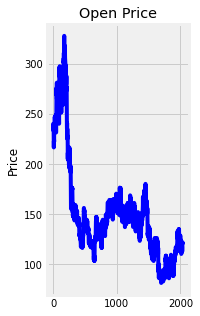

<function matplotlib.pyplot.show>

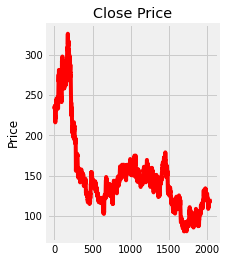

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.plot(sdata['Open'],'b')
plt.title('Open Price')
plt.ylabel('Price')
plt.show()

plt.subplot(1,2,2)
plt.plot(sdata['Close'],'r')
plt.title('Close Price')
plt.ylabel('Price')
plt.show

In [28]:
#200 Exponential Moving Average (EMA) and 200 Simple Moving Average (SMA)

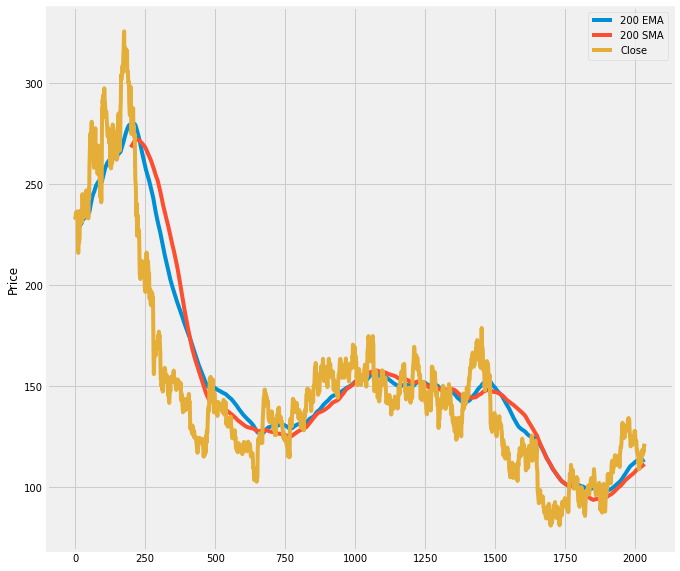

In [20]:
sdata.ewm(span=200).mean()['Close'].plot(figsize=(10,10), label = '200 EMA')
sdata.rolling(window=200).mean()['Close'].plot(figsize=(10,10), label = '200 SMA')
sdata['Close'].plot(label='Close')
plt.legend()
plt.ylabel('Price')
plt.show()

In [21]:
training_orig = sdata.loc[:, ['Close']]
training_orig

,Close
0,233.75
1,233.25
2,234.25
3,236.10
4,233.30
...,...
2030,118.65
2031,117.60
2032,120.65
2033,120.90


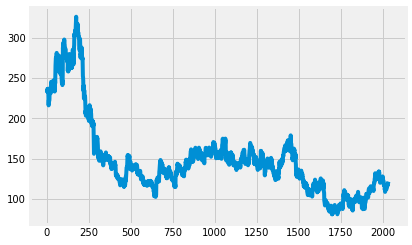

In [22]:
training_orig['Close'].plot()

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline


Text(0, 0.5, 'Close Price ($')

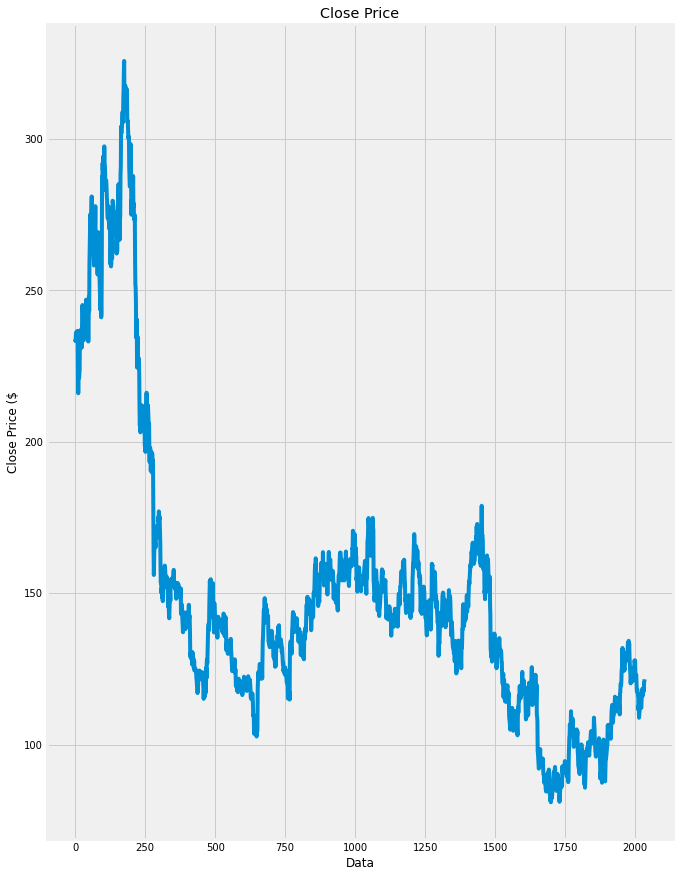

In [24]:
plt.figure(figsize=(10,15))            #setting figure size
sdata['Close'].plot()                   #plotting close price

plt.title("Close Price")               #setting plot title x and y labels
plt.xlabel('Data')
plt.ylabel('Close Price ($')

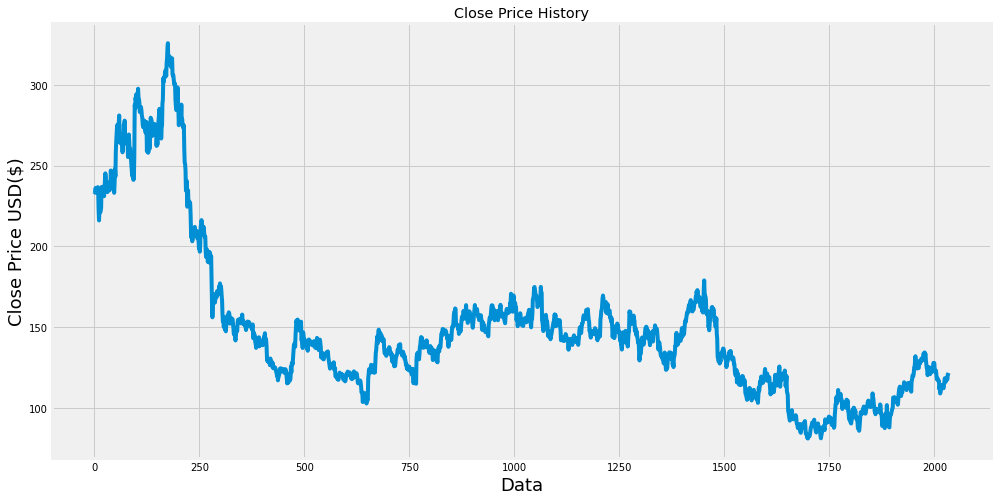

In [25]:
plt.figure(figsize=(15,8))
plt.title('Close Price History')
plt.plot(sdata['Close'])
plt.xlabel('Data',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [26]:
data=sdata.filter(['Close'])
dataset=data.values
training_data_len= math.ceil(len(dataset) * .8)

scaler=MinMaxScaler(feature_range=(0,1))                              #scale d data
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])